In [1]:
import utils as  utl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

# Convergence and attractors
In this phase, we input three memory patterns consisting of 2x4 pixel black-and-white images. Our objective is to test the network's ability to recall the stored patterns even when presented with distorted input patterns.

In [5]:
#======================== CONSTANTS ========================
# Color map for displaying images with two distinct colors : black and white
cmap = ListedColormap(['black', 'white'])

In [11]:
#========== CREATE PATTERNS ==========
# Patterns 
x1=[-1,-1, 1, -1, 1, -1, -1, 1]
x2=[-1, -1, -1, -1, -1, 1, -1, -1]
x3=[-1, 1, 1, -1, -1, 1, -1, 1]
# Convert patterns from list to numpy array
pattern1 = np.array(x1)
pattern2 = np.array(x2)
pattern3 = np.array(x3)
patterns = [pattern1, pattern2, pattern3]

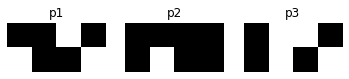

In [14]:

#========== PLOT PATTERNS ==========
for i, pattern in enumerate(patterns):
    plt.subplot(1, 3, i+1)
    plt.imshow(pattern.reshape((2,4)), cmap=cmap)
    plt.title(f'p{i+1}')
    plt.axis('off')
plt.show()

In [15]:
#========== INSTANCIATE AND TRAIN HOPFIELD NETWORK ==========
num_neurons = len(patterns[0])
hopfield_net = utl.LittleHopfieldNetwork(num_neurons)
hopfield_net.train(patterns)

In [16]:
#========== CREATE DISTORTED PATTERNS ==========
# distorted patterns 
x1d=[1, -1, 1, -1, 1, -1, -1, 1]
x2d=[1, 1, -1, -1, -1, 1, -1, -1]
x3d=[1, 1, 1, -1, 1, 1, -1, 1]
# Convert patterns from list to numpy array
pattern1d = np.array(x1d)
pattern2d = np.array(x2d)
pattern3d = np.array(x3d)
distortedPat = [pattern1d, pattern2d, pattern3d]

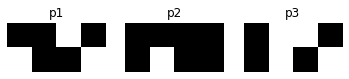

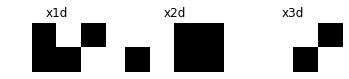

In [19]:
#========== PLOT PATTERNS ==========
for i, pattern in enumerate(patterns):
    plt.subplot(1, 3, i+1)
    plt.imshow(pattern.reshape((2,4)), cmap=cmap)
    plt.title(f'p{i+1}')
    plt.axis('off')
plt.show()

for i, pattern in enumerate(distortedPat):
    plt.subplot(1, 3, i+1)
    plt.imshow(pattern.reshape((2,4)), cmap=cmap)
    plt.title(f'x{i+1}d')
    plt.axis('off')
plt.show()

In [20]:
#========== USE RECALL FUNCTION ==========
recalledPat = []
for pattern in distortedPat:
    newPattern = hopfield_net.recall( pattern, update_type='synchronous', max_iterations=100)
    recalledPat.append(newPattern)

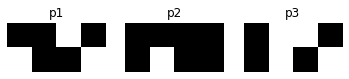

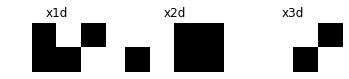

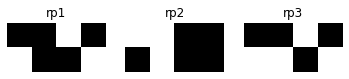

In [21]:
#========== PLOT PATTERNS ==========
for i, pattern in enumerate(patterns):
    plt.subplot(1, 3, i+1)
    plt.imshow(pattern.reshape((2,4)), cmap=cmap)
    plt.title(f'p{i+1}')
    plt.axis('off')
plt.show()

for i, pattern in enumerate(distortedPat):
    plt.subplot(1, 3, i+1)
    plt.imshow(pattern.reshape((2,4)), cmap=cmap)
    plt.title(f'x{i+1}d')
    plt.axis('off')
plt.show()

for i, pattern in enumerate(recalledPat):
    plt.subplot(1, 3, i+1)
    plt.imshow(pattern.reshape((2,4)), cmap=cmap)
    plt.title(f'rp{i+1}')
    plt.axis('off')
plt.show()

### Partial Conclusion
The network demonstrates effective pattern recall when faced with distorted input patterns, particularly succeeding when the presented pattern exhibits fewer than one error. In such cases, the network efficiently endeavors to converge towards the closest stored pattern, showcasing its ability to mitigate distortions and accurately retrieve the intended information.

# Sequential Update 

So far we have only used a very small 8-neuron network. Now we will switch
to a 1024-neuron network and picture patterns.